In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
albuquerque_population_data = pd.read_csv("../demand_influx_data/resident_population_albuquerque.csv")
seattle_population_data = pd.read_csv("../demand_influx_data/resident_population_seattle.csv")

xl_file = pd.ExcelFile("../kjndgbksnfdb-1.xlsx")

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

seattle_population_data = pd.DataFrame({"STWPOP" : dfs["Seattle"][36:49]["Source: United States Census"]})

albuquerque_population_data = pd.DataFrame({"ABQPOP" : dfs["Albuquerque"][36:49]["Source: United States Census"]})

seattle_population_data["STWPOP"] /= 1000
albuquerque_population_data["ABQPOP"] /= 1000

In [215]:
albuquerque_population_data

,ABQPOP
36,531.403
37,539
38,545.083
39,549.812
40,553.576
41,556.092
42,556.859
43,556.718
44,559.202
45,559.374


In [263]:
import scipy.optimize as opt

def f(x, a, b, c):
    return a / (1 + np.exp(-b * (x))) + c

popt, pcov = opt.curve_fit(f, np.array(range(len(albuquerque_population_data))), albuquerque_population_data["ABQPOP"].values, method="trf", maxfev=5000)
y_fit = f(np.array(range(len(albuquerque_population_data))), *popt)

In [260]:
print(popt[0], popt[1])

568.2613103186477 2.80740451673383


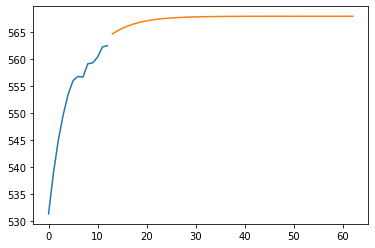

In [264]:
plt.plot(range(len(albuquerque_population_data)), albuquerque_population_data["ABQPOP"].values)
plt.plot(range(len(albuquerque_population_data), len(albuquerque_population_data)+50), [f(x, popt[0], -0.2, 568) for x in range(len(albuquerque_population_data), len(albuquerque_population_data)+50)])

In [271]:
albuquerque_pop_data = pd.DataFrame({
    "year" : list(range(2023, 2073)),
    "population" : [1000 * f(x, popt[0], -0.2, 568) for x in range(len(albuquerque_population_data), len(albuquerque_population_data)+50)]
})

albuquerque_pop_data.to_csv("albuquerque_population_data.csv", index=False)

In [272]:
import scipy.optimize as opt

def f(x, a, b, c):
    return a / (1 + np.exp(-b * (x))) + c

popt, pcov = opt.curve_fit(f, np.array(range(len(seattle_population_data))), seattle_population_data["STWPOP"].values, method="trf", maxfev=5000)
y_fit = f(np.array(range(len(seattle_population_data))), *popt)

<ipython-input-272-3ca56337f4b8>:4: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x))) + c


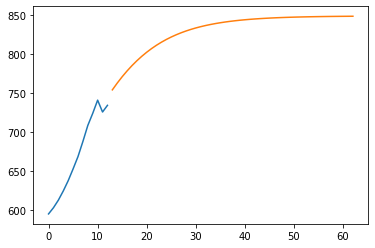

In [273]:
plt.plot(range(len(seattle_population_data)), seattle_population_data["STWPOP"].values)
plt.plot(range(len(seattle_population_data), len(seattle_population_data)+50), [f(x, popt[0], popt[1], popt[2]) for x in range(len(seattle_population_data), len(seattle_population_data)+50)])

In [274]:
seattle_pop_data = pd.DataFrame({
    "year" : list(range(2023, 2073)),
    "population" : [1000 * f(x, popt[0], popt[1], popt[2]) for x in range(len(seattle_population_data), len(seattle_population_data)+50)]
})

seattle_pop_data.to_csv("seattle_population_data.csv", index=False)

In [275]:
print(popt[0], popt[1], popt[2])

527.8662699331973 0.11679597025678204 321.48036950824707


In [276]:
seattle_pop_data

,year,population
0,2023,754486.446906
1,2024,763237.419723
2,2025,771326.563372
3,2026,778777.200371
4,2027,785617.127477
5,2028,791877.411226
6,2029,797591.307702
7,2030,802793.321367
8,2031,807518.407651
9,2032,811801.316153
